In [0]:
from google.colab.patches import cv2_imshow
import cv2
import os

In [0]:
def download_view(img_url):
  img_file = os.path.basename(img_url)
  !curl -o $img_file $img_url
  img = cv2.imread(img_file, cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)
  return img

https://nuocanh.info/wp-content/uploads/2017/10/1-34.jpg
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  155k  100  155k    0     0   507k      0 --:--:-- --:--:-- --:--:--  507k


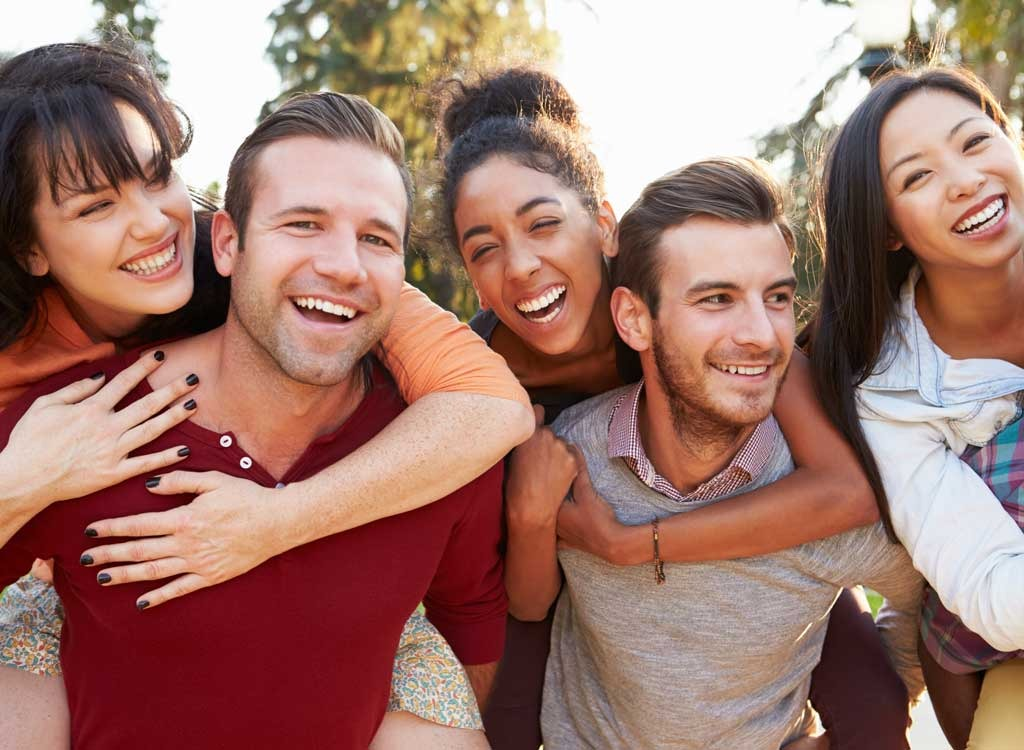

In [15]:
#@title Nhập URL

img_url = "https://nuocanh.info/wp-content/uploads/2017/10/1-34.jpg" #@param {type:"string"}
print(img_url)
img = download_view(img_url)

In [16]:
from keras.preprocessing import image as image_utils
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.applications import VGG16
import keras
import numpy as np

Using TensorFlow backend.


In [17]:
print("[INFO] loading network...")
model = VGG16(weights="imagenet")

[INFO] loading network...
553467904/553467096 [==============================] - 7s 0us/step


In [0]:
def classify(image):
  image_tmp = image.copy()
  image = cv2.resize(image, (224,224), interpolation = cv2.INTER_AREA)
  image = image_utils.img_to_array(image)
  image = np.expand_dims(image, axis=0)
  image = preprocess_input(image)
  print("[INFO] classifying image...")
  preds = model.predict(image)
  P = decode_predictions(preds)
  print("[INFO] ranking....")
  for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i+1, label, prob*100))
  (imagenetID, label, prob) = P[0][0]
  cv2.putText(image_tmp, "Label: {}, {:.2f}%".format(label, prob*100),
              (10,30), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 0), 2)
  return image_tmp

In [19]:
!sudo apt install tesseract-ocr
!pip install pytesseract 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 25 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,546 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [0]:
import pytesseract
from imutils.object_detection import non_max_suppression
import numpy as np 


In [0]:
import dlib
def detect_face(img):
  detector = dlib.get_frontal_face_detector()
  line_width = 3

  rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  dets = detector(rgb_image)
  for det in dets:
      cv2.rectangle(img,(det.left(), det.top()), (det.right(), det.bottom()), (0,0,0), line_width)
  return img
     

In [0]:
def processing(image):
  print("[INFO] classify module")
  img = classify(image)
  print("[INFO] ORC module")
  print(pytesseract.image_to_string(image, lang='eng'))
  img = detect_face(img)
  cv2_imshow(img)

[INFO] classify module
[INFO] classifying image...
40960/35363 [==================================] - 0s 0us/step
[INFO] ranking....
1. hair_spray: 19.28%
2. punching_bag: 7.37%
3. jean: 5.56%
4. comic_book: 4.72%
5. shoe_shop: 4.24%
[INFO] ORC module



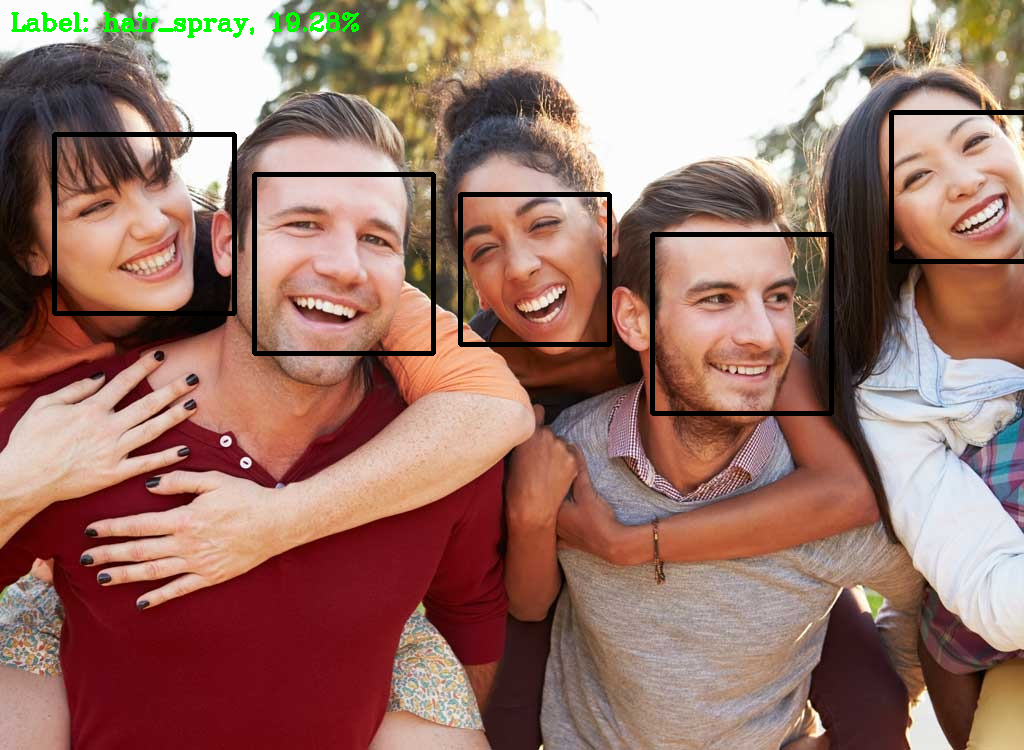

In [24]:
processing(img)